# Alex Felipe Barbosa - 29/06/2024
## Projeto 2 - Analise de Dados de RH

## Instalando e carregando os Pacotes

In [1]:
# Versão da linguagem Python
from platform import python_version
print('Versão da Linguagem Python usada neste Jupyter Notebook: ', python_version())

Versão da Linguagem Python usada neste Jupyter Notebook:  3.11.7


In [33]:
# Instala o pacote watermark
# Esse pacote é usado para gravar as versões de outros pacotes usados neste Jupyter Notebook
!pip install -q -U watermark

In [3]:
# Para criar mapa de valores ausentes
!pip install -q missingno

In [4]:
# Aplicar categorização as variaveis
!pip install -q category_encoders

In [5]:
# Pacote para criação de Graficos
!pip install -q plotly

In [34]:
# Imports 

# Manipulação de dados
import pandas as pd
import numpy as np

# Visualização
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import plotly.graph_objects as go
from plotly.subplots import make_subplots
import missingno

# Estatistica
import scipy
from scipy.stats import normaltest
from scipy.stats import chi2_contingency

# Engenharia de Atributos
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import OneHotEncoder, LabelEncoder, OrdinalEncoder
from sklearn.compose import ColumnTransformer
import category_encoders as ce

# Ignore Warning
import sys 
import warnings 
if not sys.warnoptions:
  warnings.simplefilter("ignore")

In [7]:
# Versões dos Pacotes usados neste Jupyter Notebook
%reload_ext watermark
%watermark -a "Alex Felipe Barbosa" --iversions

Author: Alex Felipe Barbosa

pandas           : 2.1.4
scipy            : 1.11.4
seaborn          : 0.12.2
numpy            : 1.23.5
matplotlib       : 3.7.1
plotly           : 5.9.0
missingno        : 0.5.2
category_encoders: 2.6.3
sys              : 3.11.7 | packaged by Anaconda, Inc. | (main, Dec 15 2023, 18:05:47) [MSC v.1916 64 bit (AMD64)]



## Carregando os dados

In [8]:
# Carrega o dataset 
df = pd.read_csv("dados/aug_train.csv")

In [9]:
# Shape
df.shape

(19158, 14)

In [10]:
# Colunas 
df.columns

Index(['enrollee_id', 'city', 'city_development_index', 'gender',
       'relevent_experience', 'enrolled_university', 'education_level',
       'major_discipline', 'experience', 'company_size', 'company_type',
       'last_new_job', 'training_hours', 'target'],
      dtype='object')

In [11]:
# Amostra de Dados
df.head()

,enrollee_id,city,city_development_index,gender,relevent_experience,enrolled_university,education_level,major_discipline,experience,company_size,company_type,last_new_job,training_hours,target
0,8949,city_103,0.920,Male,Has relevent experience,no_enrollment,Graduate,STEM,>20,NaN,NaN,1,36,1.0
1,29725,city_40,0.776,Male,No relevent experience,no_enrollment,Graduate,STEM,15,50-99,Pvt Ltd,>4,47,0.0
2,11561,city_21,0.624,NaN,No relevent experience,Full time course,Graduate,STEM,5,NaN,NaN,never,83,0.0
3,33241,city_115,0.789,NaN,No relevent experience,NaN,Graduate,Business Degree,<1,NaN,Pvt Ltd,never,52,1.0
4,666,city_162,0.767,Male,Has relevent experience,no_enrollment,Masters,STEM,>20,50-99,Funded Startup,4,8,0.0


In [12]:
# Info
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 19158 entries, 0 to 19157
Data columns (total 14 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   enrollee_id             19158 non-null  int64  
 1   city                    19158 non-null  object 
 2   city_development_index  19158 non-null  float64
 3   gender                  14650 non-null  object 
 4   relevent_experience     19158 non-null  object 
 5   enrolled_university     18772 non-null  object 
 6   education_level         18698 non-null  object 
 7   major_discipline        16345 non-null  object 
 8   experience              19093 non-null  object 
 9   company_size            13220 non-null  object 
 10  company_type            13018 non-null  object 
 11  last_new_job            18735 non-null  object 
 12  training_hours          19158 non-null  int64  
 13  target                  19158 non-null  float64
dtypes: float64(2), int64(2), object(10)
me

## Análise Exploratória de Dados


In [13]:
# Descrevendo os dados não numéricos
df.describe(include=object)

,city,gender,relevent_experience,enrolled_university,education_level,major_discipline,experience,company_size,company_type,last_new_job
count,19158,14650,19158,18772,18698,16345,19093,13220,13018,18735
unique,123,3,2,3,5,6,22,8,6,6
top,city_103,Male,Has relevent experience,no_enrollment,Graduate,STEM,>20,50-99,Pvt Ltd,1
freq,4355,13221,13792,13817,11598,14492,3286,3083,9817,8040


In [14]:
# Descrevendo os dados numéricos
df.describe().drop(columns=['enrollee_id','target'])

,city_development_index,training_hours
count,19158.000000,19158.000000
mean,0.828848,65.366896
std,0.123362,60.058462
min,0.448000,1.000000
25%,0.740000,23.000000
50%,0.903000,47.000000
75%,0.920000,88.000000
max,0.949000,336.000000


- Em city_development_index(CDI), os valores médios são 0,828, mediana 0,903 e std 0,123. Isso significa que a maioria dos candidatos é de cidades bem desenvolvidas.
- Em training_hours, os valores médios são 66,367, mediana 47 e max 336. Isso significa que há mais candidatos com poucas horas de treinamento, mas alguns candidatos gastam muito tempo para fazer o treinamento.

### Visualizando as Variaveis Categóricas

In [15]:
list(df.columns.values)[3:12]

['gender',
 'relevent_experience',
 'enrolled_university',
 'education_level',
 'major_discipline',
 'experience',
 'company_size',
 'company_type',
 'last_new_job']

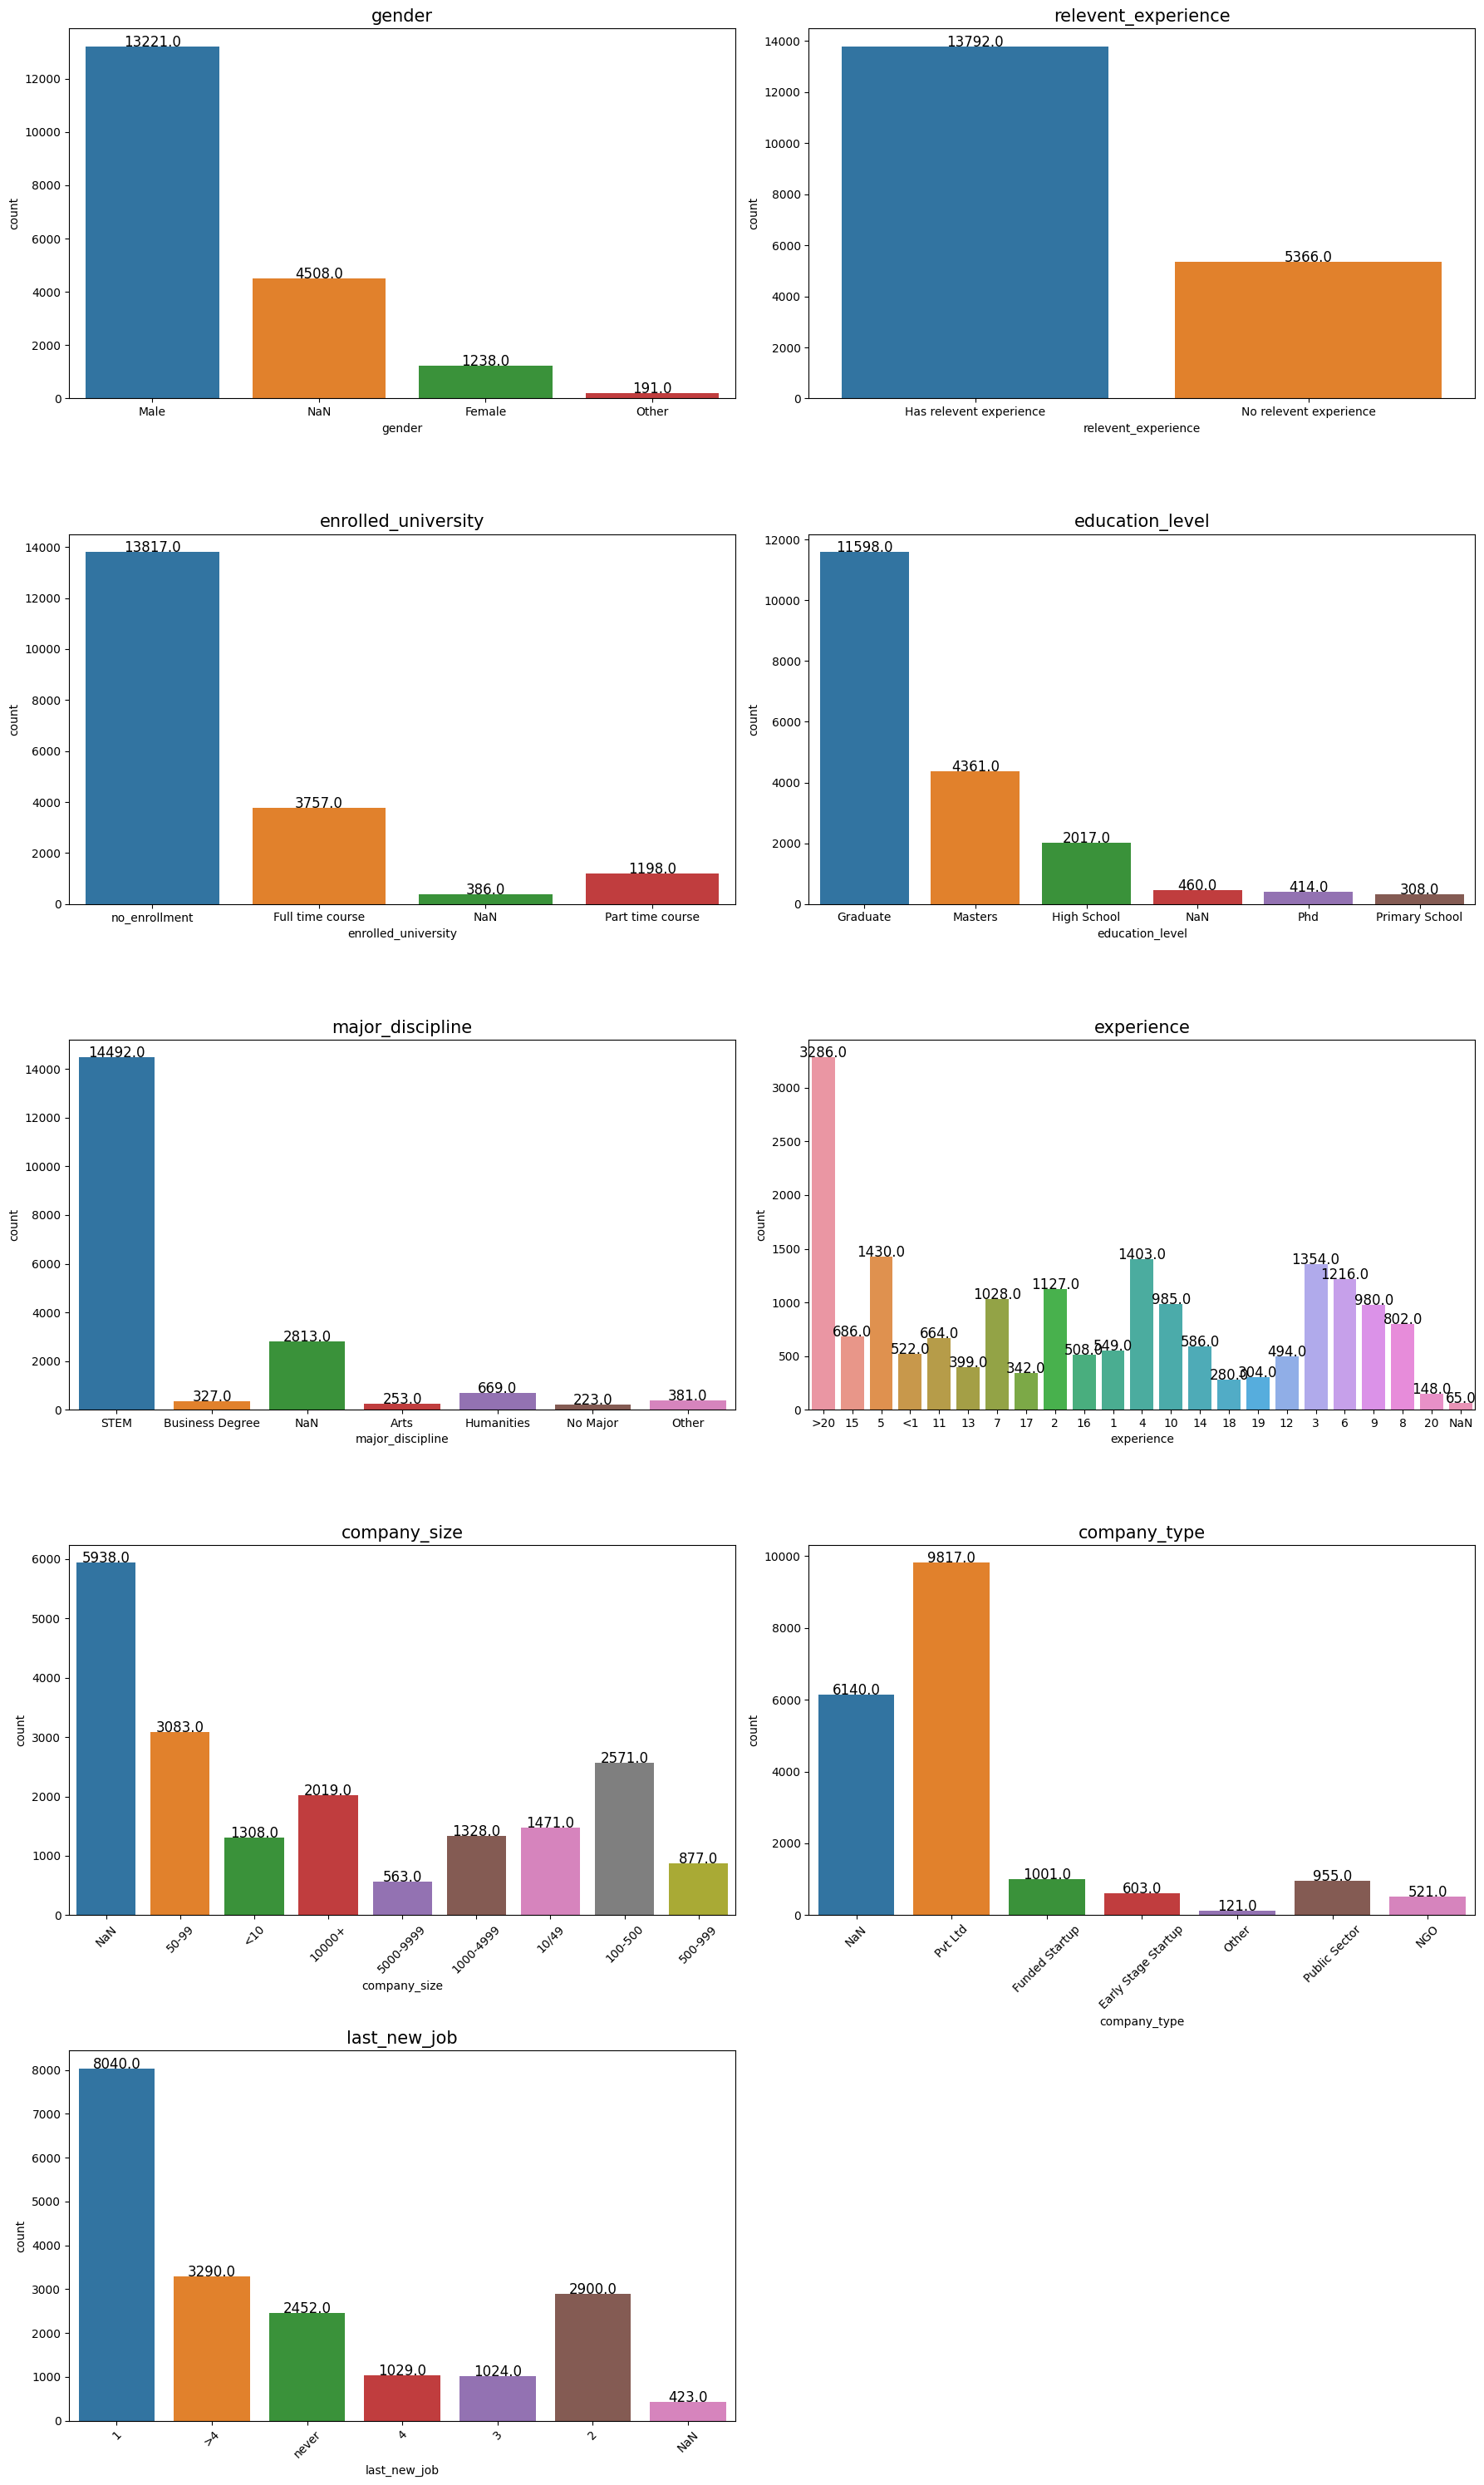

In [16]:
# Plot 

# Tamanho da figura
plt.figure(figsize= (18,30))

# Lista de colunas 
column_list = list(df.columns.values)[3:12]

# Contador
A = 0

# Loop 
for i in column_list:
  A += 1
  plt.subplot(5, 2, A)
  ax = sns.countplot(data= df.fillna('NaN'), x = i)
  plt.title(i, fontsize = 15)
  for p in ax.patches:
    ax.annotate(f'\n{p.get_height()}', (p.get_x()+0.4, p.get_height()), ha = 'center', color = 'black', size = 12)
  if A >= 7:
    plt.xticks(rotation = 45)
    
# Layout    
plt.tight_layout(h_pad= 2)

### Verificando a Distribuição das Variáveis Numéricas 

In [17]:
# Descrevendo os Dados Numéricos
df.describe().drop(columns= ['enrollee_id', 'target'])

,city_development_index,training_hours
count,19158.000000,19158.000000
mean,0.828848,65.366896
std,0.123362,60.058462
min,0.448000,1.000000
25%,0.740000,23.000000
50%,0.903000,47.000000
75%,0.920000,88.000000
max,0.949000,336.000000


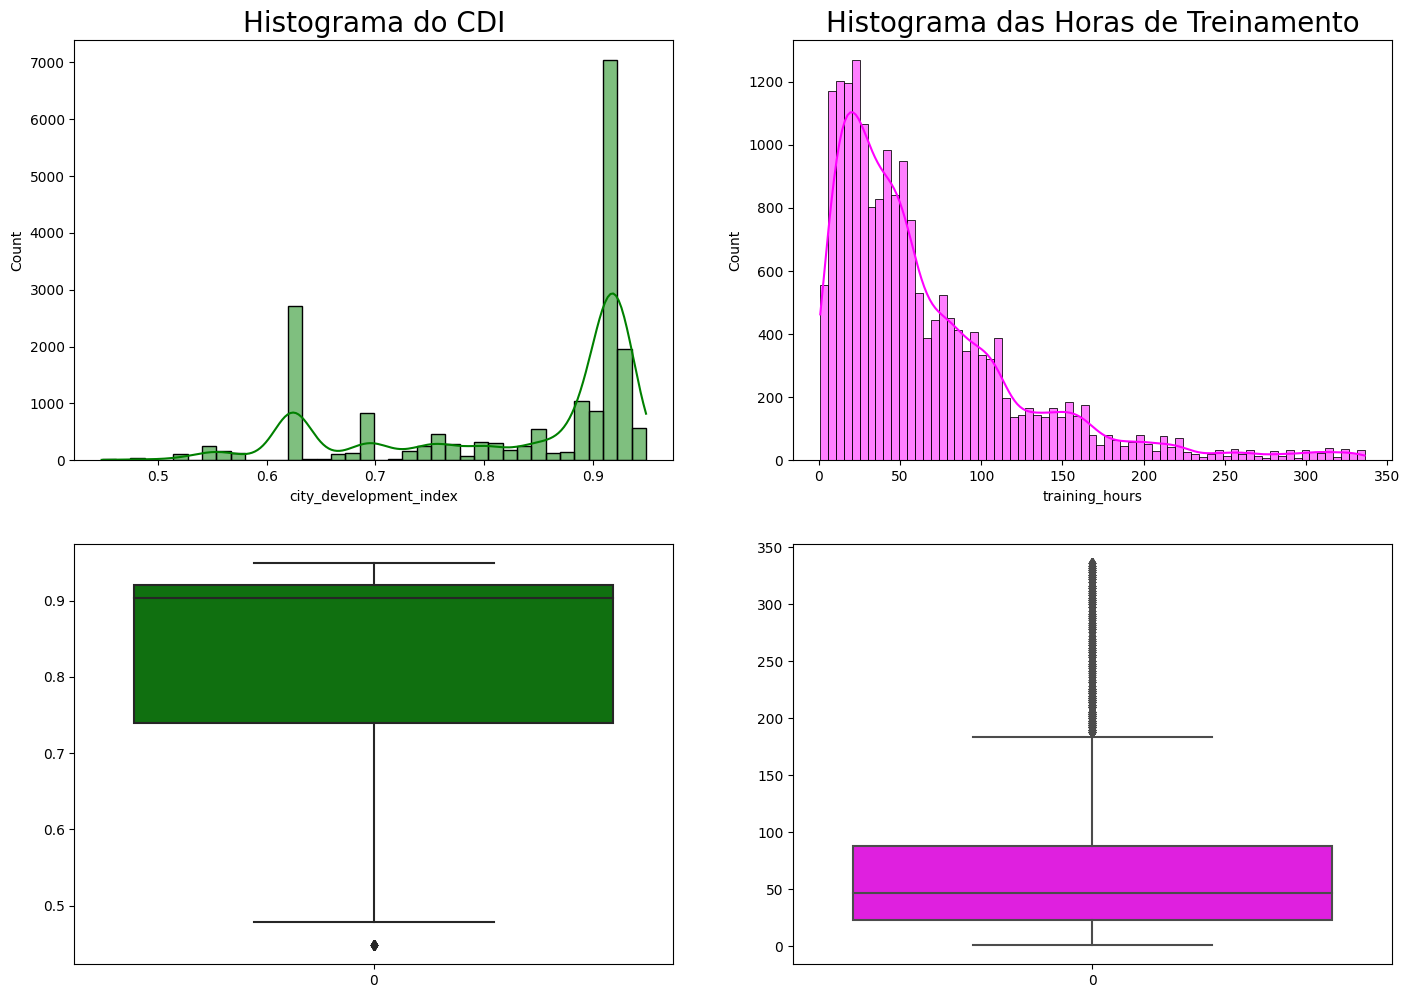

In [18]:
# Figura 
plt.figure(figsize= (17,12))

# Subplots com histogramas
plt.subplot(221)
sns.color_palette("hls", 8)
sns.histplot(df['city_development_index'], kde = True, color= "green")
plt.title("Histograma do CDI", fontsize = 20)

plt.subplot(222)
sns.histplot(df['training_hours'], kde = True, color= "magenta")
plt.title('Histograma das Horas de Treinamento', fontsize = 20)

# Subplots com boxplots
plt.subplot(223)
sns.boxplot(df['city_development_index'], color= 'green')

plt.subplot(224)
sns.boxplot(df['training_hours'], color= 'magenta')

plt.show()

In [19]:
# Teste de Normalidade de Distribuição 

# Lista com as variaveis numéricas 
numerical_feature = ['city_development_index', 'training_hours']

# Loop
for i in numerical_feature:
  
  # Calcula a normalidade
  stats, pval = normaltest(df[i])
  
  if pval > 0.05:
    print(i, ': Distribuição Normal')
  else:
    print(i, ': Distribuição Não Normal')

city_development_index : Distribuição Não Normal
training_hours : Distribuição Não Normal


### Correlação dos Dados

Correlação de Spearman entre variáveis numéricas 
Analisamos a correlação entre as variáveis numérica e a variavel alvo (o que estamos querendo analisar)

In [20]:
df.head()

,enrollee_id,city,city_development_index,gender,relevent_experience,enrolled_university,education_level,major_discipline,experience,company_size,company_type,last_new_job,training_hours,target
0,8949,city_103,0.920,Male,Has relevent experience,no_enrollment,Graduate,STEM,>20,NaN,NaN,1,36,1.0
1,29725,city_40,0.776,Male,No relevent experience,no_enrollment,Graduate,STEM,15,50-99,Pvt Ltd,>4,47,0.0
2,11561,city_21,0.624,NaN,No relevent experience,Full time course,Graduate,STEM,5,NaN,NaN,never,83,0.0
3,33241,city_115,0.789,NaN,No relevent experience,NaN,Graduate,Business Degree,<1,NaN,Pvt Ltd,never,52,1.0
4,666,city_162,0.767,Male,Has relevent experience,no_enrollment,Masters,STEM,>20,50-99,Funded Startup,4,8,0.0


In [21]:
df.columns

Index(['enrollee_id', 'city', 'city_development_index', 'gender',
       'relevent_experience', 'enrolled_university', 'education_level',
       'major_discipline', 'experience', 'company_size', 'company_type',
       'last_new_job', 'training_hours', 'target'],
      dtype='object')

In [22]:
# Criamos uma cópia do dataframe original
df_numerical = df.copy()

In [23]:
df_numerical["experience"].value_counts()

experience
>20    3286
5      1430
4      1403
3      1354
6      1216
2      1127
7      1028
10      985
9       980
8       802
15      686
11      664
14      586
1       549
<1      522
16      508
12      494
13      399
17      342
19      304
18      280
20      148
Name: count, dtype: int64

In [24]:
df_numerical["last_new_job"].value_counts()

last_new_job
1        8040
>4       3290
2        2900
never    2452
4        1029
3        1024
Name: count, dtype: int64

In [25]:
# Convertemos a variavel last_new_job para numérica
df_numerical["last_new_job"] = np.where(df_numerical["last_new_job"] == "never", 0, df_numerical["last_new_job"])
df_numerical["last_new_job"] = np.where(df_numerical["last_new_job"] == ">4", 5, df_numerical["last_new_job"])
df_numerical["last_new_job"] = df_numerical["last_new_job"].astype(float)

In [26]:
# Convertemos a variavel experience para numérica
df_numerical["experience"] = np.where(df_numerical["experience"] == "<1", 1, df_numerical["experience"])
df_numerical["experience"] = np.where(df_numerical["experience"] == ">20", 21, df_numerical["experience"])
df_numerical["experience"] = df_numerical["experience"].astype(float)

In [27]:
df_numerical["last_new_job"].value_counts()

last_new_job
1.0    8040
5.0    3290
2.0    2900
0.0    2452
4.0    1029
3.0    1024
Name: count, dtype: int64

In [28]:
df_numerical["experience"].value_counts()

experience
21.0    3286
5.0     1430
4.0     1403
3.0     1354
6.0     1216
2.0     1127
1.0     1071
7.0     1028
10.0     985
9.0      980
8.0      802
15.0     686
11.0     664
14.0     586
16.0     508
12.0     494
13.0     399
17.0     342
19.0     304
18.0     280
20.0     148
Name: count, dtype: int64

In [29]:
df_numerical.head()

,enrollee_id,city,city_development_index,gender,relevent_experience,enrolled_university,education_level,major_discipline,experience,company_size,company_type,last_new_job,training_hours,target
0,8949,city_103,0.920,Male,Has relevent experience,no_enrollment,Graduate,STEM,21.0,NaN,NaN,1.0,36,1.0
1,29725,city_40,0.776,Male,No relevent experience,no_enrollment,Graduate,STEM,15.0,50-99,Pvt Ltd,5.0,47,0.0
2,11561,city_21,0.624,NaN,No relevent experience,Full time course,Graduate,STEM,5.0,NaN,NaN,0.0,83,0.0
3,33241,city_115,0.789,NaN,No relevent experience,NaN,Graduate,Business Degree,1.0,NaN,Pvt Ltd,0.0,52,1.0
4,666,city_162,0.767,Male,Has relevent experience,no_enrollment,Masters,STEM,21.0,50-99,Funded Startup,4.0,8,0.0


In [35]:
df_numerical.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 19158 entries, 0 to 19157
Data columns (total 14 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   enrollee_id             19158 non-null  int64  
 1   city                    19158 non-null  object 
 2   city_development_index  19158 non-null  float64
 3   gender                  14650 non-null  object 
 4   relevent_experience     19158 non-null  object 
 5   enrolled_university     18772 non-null  object 
 6   education_level         18698 non-null  object 
 7   major_discipline        16345 non-null  object 
 8   experience              19093 non-null  float64
 9   company_size            13220 non-null  object 
 10  company_type            13018 non-null  object 
 11  last_new_job            18735 non-null  float64
 12  training_hours          19158 non-null  int64  
 13  target                  19158 non-null  float64
dtypes: float64(4), int64(2), object(8)
mem

In [36]:
df_numerical.drop("enrollee_id", axis = 1).corr("spearman")

ValueError: could not convert string to float: 'city_103'

In [37]:
# Heatmap
plt.figure(figsize= (7,7))
sns.heatmap(df_numerical.drop("enrollee_id", axis= 1).corr("spearman"), annot= True, cmap='Y1GnBu')
plt.title("Mapa de Correlação das variaveis numéricas\n", fontsize = 15)
plt.show()

ValueError: could not convert string to float: 'city_103'

<Figure size 700x700 with 0 Axes>

### Weight of Evidence (WOE) - Peso da Evidência
### Information Value (IV) - Poder de Previsão 

Este conjunto de dados contém mais dados com tipo categórico do que tipo numérico. Usaremos recursos categóricos normais para WOE e IV

Interpretamos o resultado do IV assim:

Information Value, Poder de Previsão
 - <0.02     , não deve ser usado para previsão
 - 0.02 a 0.1, preditor fraco
 - 0.1  a 0.3, preditor médio
 - 0.3  a 0.5, preditor forte
 - 0.5       , parece demais pra ser verdade


In [38]:
# Loop 
for i in df.drop(columns= ['target',
                           'enrollee_id',
                           'city',
                           'city_development_index',
                           'training_hours',
                           'experience',
                           'last_new_job',
                           'company_size']).columns:
  
  df_woe_iv = (pd.crosstab(df[i], df['target'], normalize='columns')
               .assign(woe = lambda dfx: np.log(dfx[1] / dfx[0]))
               .assign(iv = lambda dfx: np.sum(dfx['woe'] *  (dfx[1]-dfx[0]))))
  
  print(df_woe_iv, '\n-----------------------------------------------------------')

target      0.0       1.0       woe        iv
gender                                       
Female  0.08098  0.096222  0.172452  0.003337
Male    0.90650  0.889020 -0.019471  0.003337
Other   0.01252  0.014758  0.164458  0.003337 
-----------------------------------------------------------
target                        0.0       1.0       woe        iv
relevent_experience                                            
Has relevent experience  0.753147  0.619845 -0.194790  0.083523
No relevent experience   0.246853  0.380155  0.431784  0.083523 
-----------------------------------------------------------
target                    0.0       1.0       woe        iv
enrolled_university                                        
Full time course     0.164754  0.307477  0.623947  0.118886
Part time course     0.063465  0.064890  0.022210  0.118886
no_enrollment        0.771781  0.627632 -0.206746  0.118886 
-----------------------------------------------------------
target                0.0      

<Figure size 1000x1200 with 0 Axes>

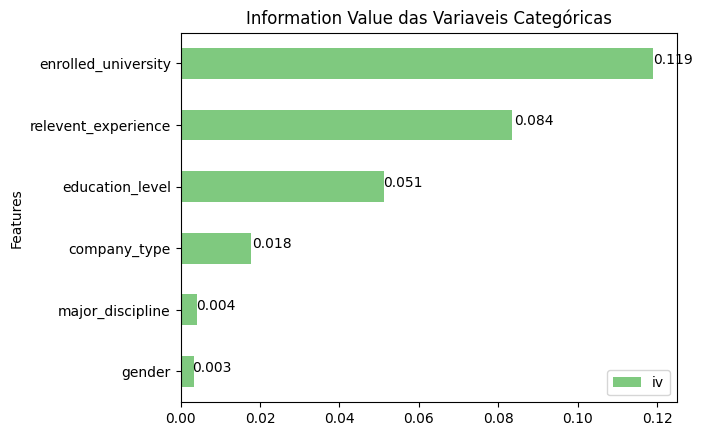

In [41]:
# Plot do Information Value (IV)

# Variaveis categóricas 
columns_cat = df.drop(columns= ['target',
                                'enrollee_id',
                                'city',
                                'city_development_index',
                                'training_hours',
                                'experience',
                                'last_new_job',
                                'company_size']).columns

# Lista para o IV
iv = []

# Loop 
for i in columns_cat:
  df_woe_iv = (pd.crosstab(df[i], df['target'], normalize='columns')
               .assign(woe=lambda dfx: np.log(dfx[1] / dfx[0]))
               .assign(iv=lambda dfx: np.sum(dfx['woe'] * (dfx[1] - dfx[0]))))
  iv.append(df_woe_iv['iv'][0])
  
  
# Dataframe
df_iv = pd.DataFrame({'Features':columns_cat, 'iv':iv}).set_index('Features').sort_values(by='iv')

# Plot
# Figura
plt.figure(figsize= (10,12))
df_iv.plot(kind = 'barh', title = 'Information Value das Variaveis Categóricas', colormap = 'Accent')
for index, value in enumerate(list(round(df_iv["iv"],3))):
  plt.text((value), index, str(value))
plt.legend(loc = 'lower right')
plt.show()

### Identificando Valores Ausentes

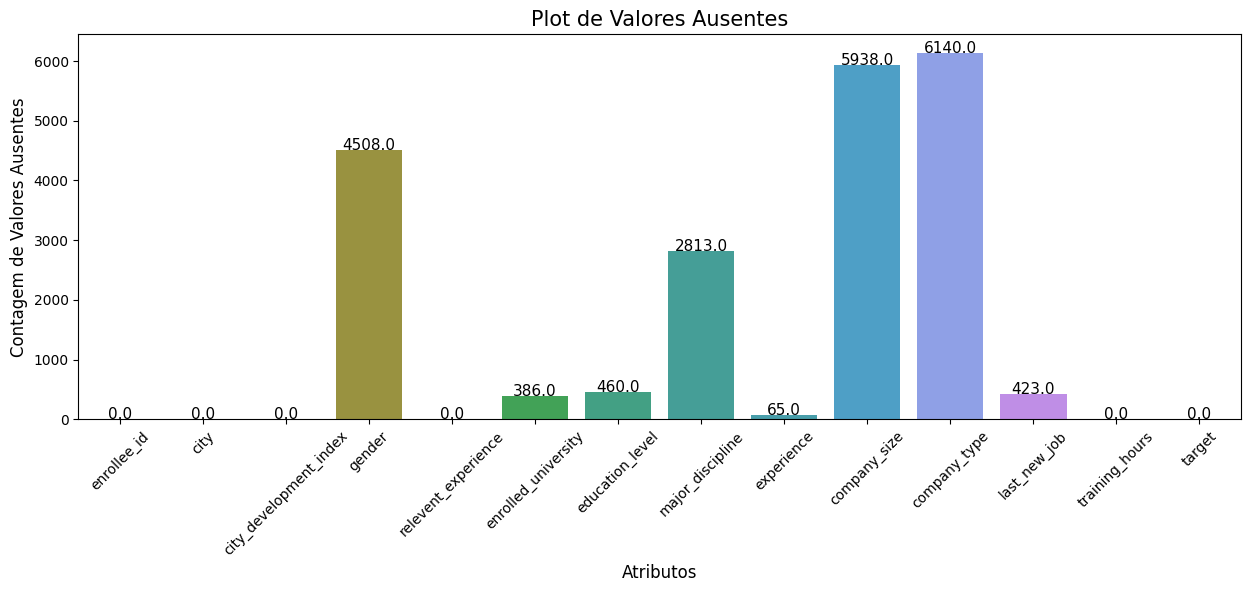

In [49]:
# Valores ausentes por coluna
null_df = df.isna().sum().reset_index()

# Figura 
ax = plt.figure(figsize = (15,5))

# Barplot
ax = sns.barplot(x='index', y=0, data=null_df, palette='husl')
plt.xlabel('Atributos', fontsize = 12)
plt.ylabel('Contagem de Valores Ausentes', fontsize = 12)
plt.xticks(rotation = 45)
plt.title("Plot de Valores Ausentes", fontsize = 15)

for p in ax.patches:
  ax.annotate(f'\n{p.get_height()}', (p.get_x()+0.4, (p.get_height())), ha = 'center', color = 'black', size = 11)
  
plt.show()  

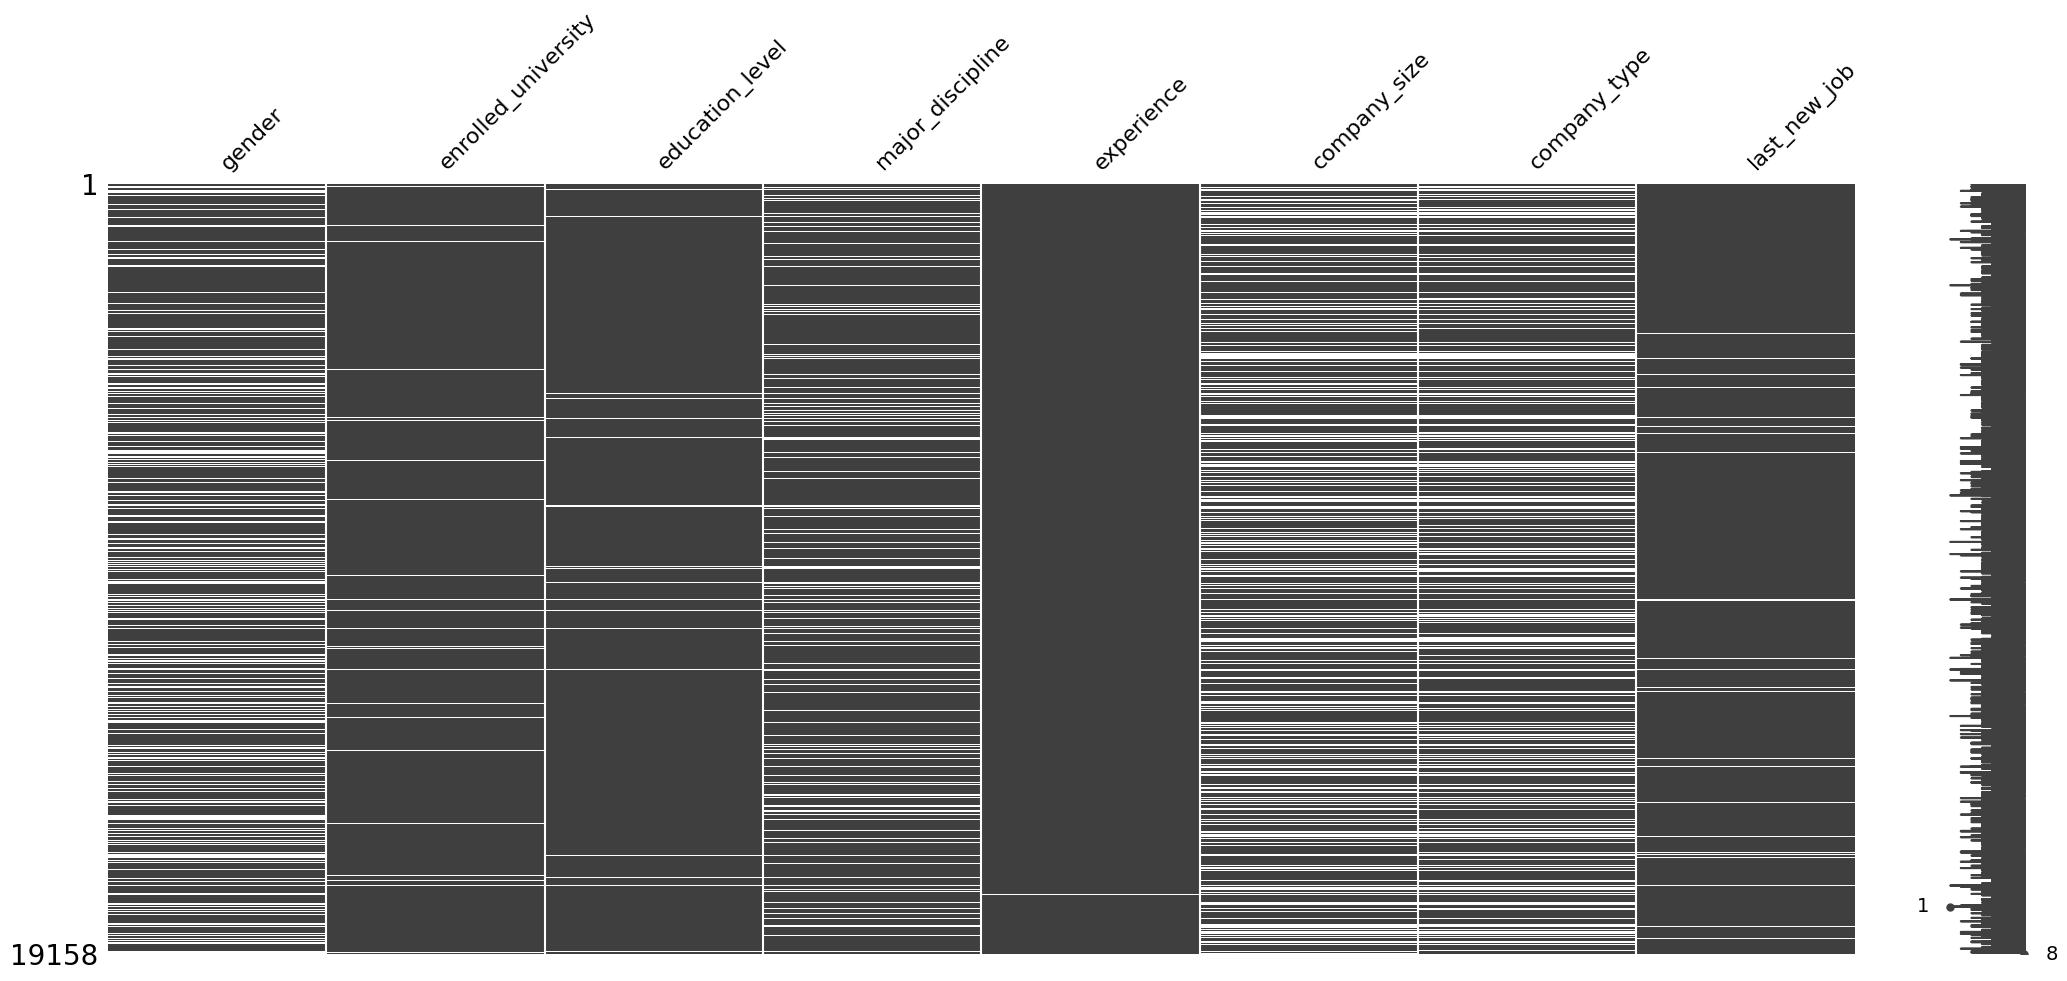

In [50]:
# Gera a visualização

# Dataframe
df_nan = pd.DataFrame(df.isna().sum())

# Plot - Mapa de Valores Ausentes 
if df.isna().any(axis=None):
  missingno.matrix(df[df_nan[df_nan[0]>0].index])
  plt.show()

Valores ausentes em cada coluna têm uma padrão aleatório

### Identificando Valores Duplicados

In [51]:
# Checando valores duplicados
df['enrollee_id'].duplicated().sum()

0

### Identificando Dados Desbalanceados

(-1.1035432385367814,
 1.1744093046554405,
 -1.1740725989164185,
 1.1035272088709263)

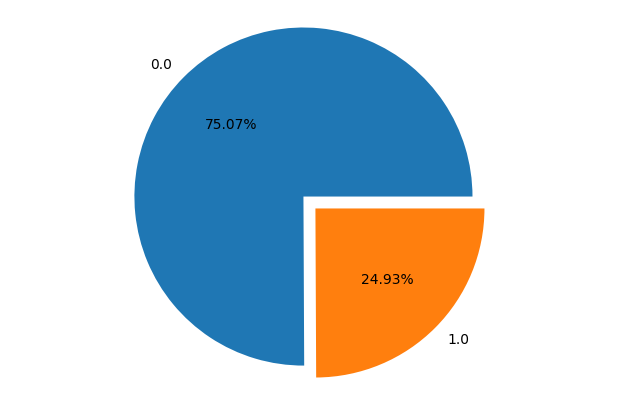

In [52]:
# Figura 
plt.figure(figsize= (17,(100)/20))

plt.subplot(121)
plt.pie(round(df['target'].value_counts() / len(df) * 100, 2),
        labels= list(df['target'].value_counts().index),
        autopct= "%.2f%%",
        explode= (0,0.1))

plt.axis("equal")

## Limpeza e Processamento dos Dados

Em que momento fazemos a limpeza dos dados?

### Tratando os Valores Ausentes

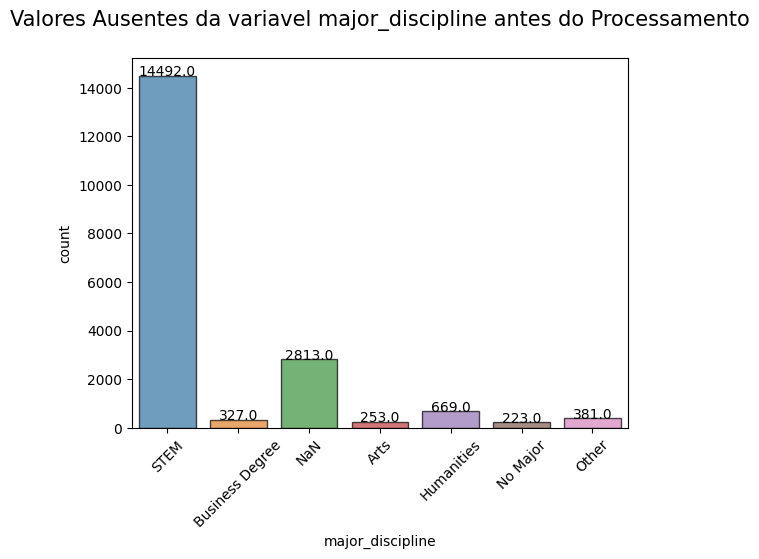

In [53]:
# Valores Ausentes da Variavel major_discipline antes do Processamento
sns.countplot(data= df.fillna('NaN'), x= 'major_discipline', alpha = 0.7, edgecolor = 'black')
plt.xticks(rotation = 45)
bound = ax.get_xbound()
ax = plt.gca()
for p in ax.patches:
  ax.annotate(f'\n{p.get_height()}', (p.get_x()+0.4, p.get_height()), ha = 'center', color = 'black', size = 10)
plt.title("Valores Ausentes da variavel major_discipline antes do Processamento\n", fontsize = 15)
plt.show()

In [54]:
# Valores ausentes major_discipline X education_level
print('Total de Valores ausentes: ', df['major_discipline'].isna().sum())
df[df['major_discipline'].isna()]['education_level'].value_counts(dropna=False)

Total de Valores ausentes:  2813


education_level
High School       2017
NaN                460
Primary School     308
Graduate            22
Masters              6
Name: count, dtype: int64

Todos os candidatos com high school tem valores NA na variavel nivel_educacao em relação a variavel major_discipline, portanto, preencheremos major_discipline com NA Non Degree

In [55]:
df.columns

Index(['enrollee_id', 'city', 'city_development_index', 'gender',
       'relevent_experience', 'enrolled_university', 'education_level',
       'major_discipline', 'experience', 'company_size', 'company_type',
       'last_new_job', 'training_hours', 'target'],
      dtype='object')

In [59]:
colunas_manter = ['city_development_index', 
                  'relevent_experience', 
                  'enrolled_university', 
                  'education_level',
                  'major_discipline', 
                  'experience', 
                  'company_type',                  
                  'training_hours', 
                  'target']

new_df = df[colunas_manter]   

In [60]:
new_df.head()

,city_development_index,relevent_experience,enrolled_university,education_level,major_discipline,experience,company_type,training_hours,target
0,0.920,Has relevent experience,no_enrollment,Graduate,STEM,>20,NaN,36,1.0
1,0.776,No relevent experience,no_enrollment,Graduate,STEM,15,Pvt Ltd,47,0.0
2,0.624,No relevent experience,Full time course,Graduate,STEM,5,NaN,83,0.0
3,0.789,No relevent experience,NaN,Graduate,Business Degree,<1,Pvt Ltd,52,1.0
4,0.767,Has relevent experience,no_enrollment,Masters,STEM,>20,Funded Startup,8,0.0


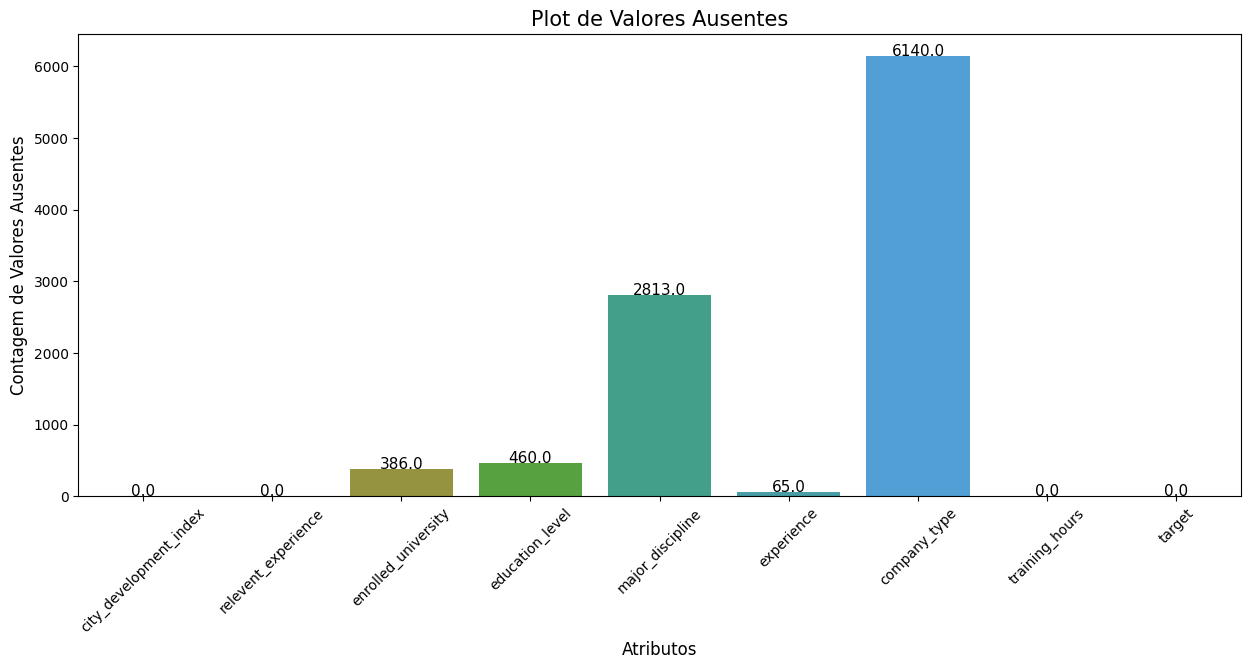

In [61]:
# Valores ausentes por coluna
null_df = new_df.isna().sum().reset_index()

# Figura 
ax = plt.figure(figsize = (15,6))

# Barplot
ax = sns.barplot(x='index', y=0, data=null_df, palette='husl')
plt.xlabel('Atributos', fontsize = 12)
plt.ylabel('Contagem de Valores Ausentes', fontsize = 12)
plt.xticks(rotation = 45)
plt.title("Plot de Valores Ausentes", fontsize = 15)

for p in ax.patches:
  ax.annotate(f'\n{p.get_height()}', (p.get_x()+0.4, (p.get_height())), ha = 'center', color = 'black', size = 11)
  
plt.show()  

Variavel: major_discipline

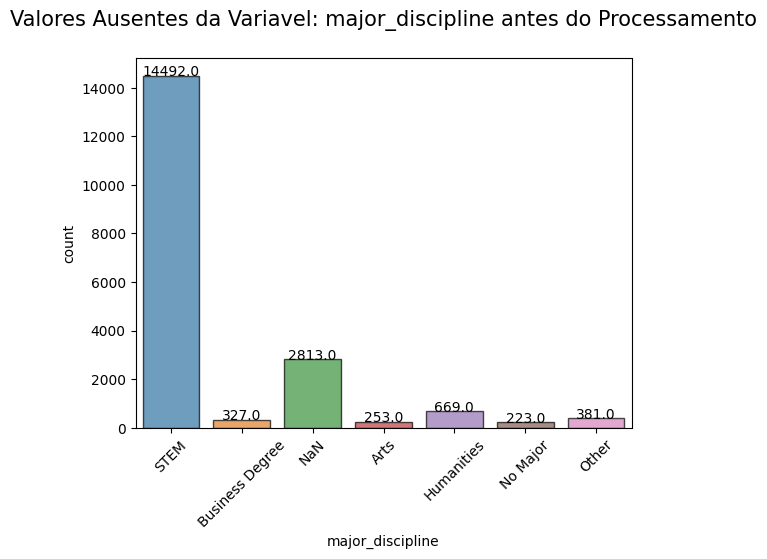

In [62]:
# Valores Ausentes da Variavel: major_discipline antes do Processamento
sns.countplot(data= new_df.fillna('NaN'), x= 'major_discipline', alpha = 0.7, edgecolor = 'black')
plt.xticks(rotation = 45)
bound = ax.get_xbound()
ax = plt.gca()
for p in ax.patches:
  ax.annotate(f'\n{p.get_height()}', (p.get_x()+0.4, p.get_height()), ha="center", color = 'black', size = 10)
plt.title("Valores Ausentes da Variavel: major_discipline antes do Processamento\n", fontsize = 15)
plt.show()

In [63]:
# Relação entre major_discipline X education_level
print('\nTotal de Valores Ausentes na variavel: major_discipline: ', new_df['major_discipline'].isna().sum())
print('\nProporção de Valores Ausentes na variavel: education_level:')
new_df[new_df['major_discipline'].isna()]['education_level'].value_counts(dropna=False)


Total de Valores Ausentes na variavel: major_discipline:  2813

Proporção de Valores Ausentes na variavel: education_level:


education_level
High School       2017
NaN                460
Primary School     308
Graduate            22
Masters              6
Name: count, dtype: int64

Dentre os registros com valores ausentes, vemos a proporção na variavel education_level.
Preencheremos com valores NA da variavel major_discipline com Non Degree

In [72]:
# Cria o Indice
nan_index = (new_df[(new_df['major_discipline'].isna()) & ((new_df['education_level']=='High School') | (new_df['education_level'].isna()) | (new_df['education_level']=='Primary School'))]).index

In [73]:
len(nan_index)

460

In [74]:
# Imputação de valor ausente
new_df['major_discipline'][nan_index] = 'Non Degree'

In [75]:
print('Total de Valores Ausentes na Variavel: major_discipline: ', new_df['major_discipline'].isna().sum())
new_df['major_discipline'].value_counts(dropna=False)

Total de Valores Ausentes na Variavel: major_discipline:  28


major_discipline
STEM               14492
Non Degree          2785
Humanities           669
Other                381
Business Degree      327
Arts                 253
No Major             223
NaN                   28
Name: count, dtype: int64

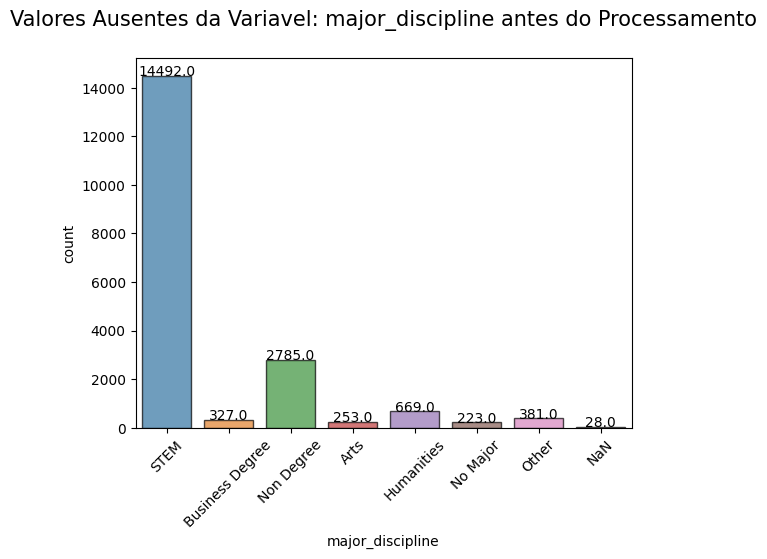

In [76]:
# Valores Ausentes da Variavel: major_discipline após do Processamento
sns.countplot(data= new_df.fillna('NaN'), x= 'major_discipline', alpha = 0.7, edgecolor = 'black')
plt.xticks(rotation = 45)
bound = ax.get_xbound()
ax = plt.gca()
for p in ax.patches:
  ax.annotate(f'\n{p.get_height()}', (p.get_x()+0.4, p.get_height()), ha="center", color = 'black', size = 10)
plt.title("Valores Ausentes da Variavel: major_discipline antes do Processamento\n", fontsize = 15)
plt.show()

In [77]:
# Para os valores ausentes restantes preenchemos com 'Other'
new_df[new_df['major_discipline'].isna()] = 'Other'

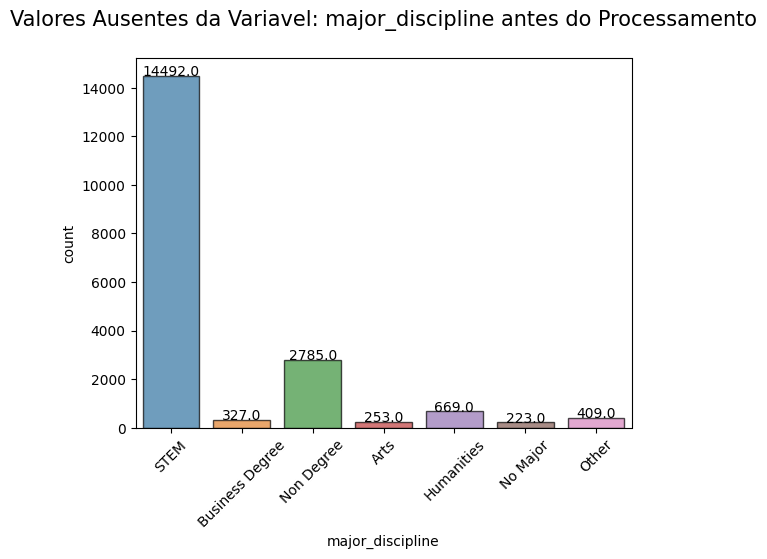

In [78]:
# Valores Ausentes da Variavel: major_discipline após do Processamento
sns.countplot(data= new_df.fillna('NaN'), x= 'major_discipline', alpha = 0.7, edgecolor = 'black')
plt.xticks(rotation = 45)
bound = ax.get_xbound()
ax = plt.gca()
for p in ax.patches:
  ax.annotate(f'\n{p.get_height()}', (p.get_x()+0.4, p.get_height()), ha="center", color = 'black', size = 10)
plt.title("Valores Ausentes da Variavel: major_discipline antes do Processamento\n", fontsize = 15)
plt.show()

In [79]:
new_df.head()

,city_development_index,relevent_experience,enrolled_university,education_level,major_discipline,experience,company_type,training_hours,target
0,0.92,Has relevent experience,no_enrollment,Graduate,STEM,>20,NaN,36,1.0
1,0.776,No relevent experience,no_enrollment,Graduate,STEM,15,Pvt Ltd,47,0.0
2,0.624,No relevent experience,Full time course,Graduate,STEM,5,NaN,83,0.0
3,0.789,No relevent experience,NaN,Graduate,Business Degree,<1,Pvt Ltd,52,1.0
4,0.767,Has relevent experience,no_enrollment,Masters,STEM,>20,Funded Startup,8,0.0


Variavel: enrolled_university

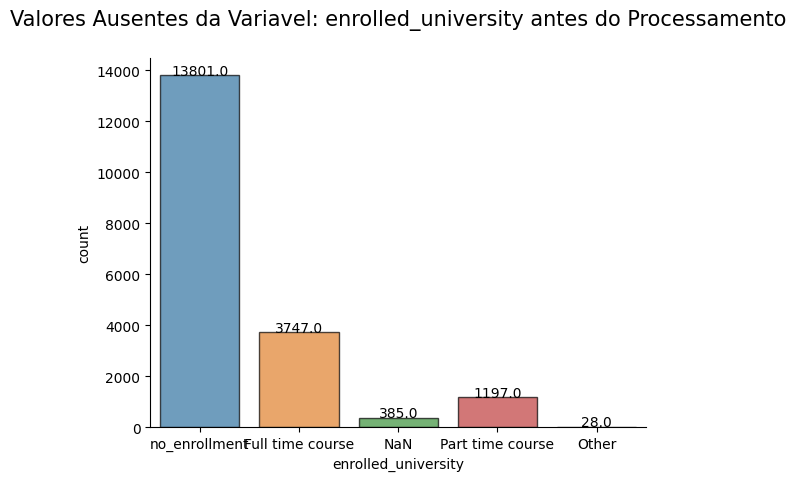

In [80]:
# Plot
sns.countplot(data= new_df.fillna('NaN'), x= 'enrolled_university', alpha = 0.7, edgecolor = 'black')
sns.despine()
plt.xticks()
bound = ax.get_xbound()
ax = plt.gca()
for p in ax.patches:
  ax.annotate(f'\n{p.get_height()}', (p.get_x()+0.4, p.get_height()), ha="center", color = 'black', size = 10)
plt.title("Valores Ausentes da Variavel: enrolled_university antes do Processamento\n", fontsize = 15)
plt.show()

In [81]:
print('\nTotal de Valores Ausentes na Variavel: enrolled_university: ', new_df['enrolled_university'].isna().sum())
print('\nProporção de Valores Ausentes na Variavel: education_level:')
new_df[new_df['enrolled_university'].isna()]['education_level'].value_counts(dropna=False)


Total de Valores Ausentes na Variavel: enrolled_university:  385

Proporção de Valores Ausentes na Variavel: education_level:


education_level
Graduate          170
NaN               100
Masters            53
High School        47
Primary School      9
Phd                 6
Name: count, dtype: int64

Candidatos com Primary School como education_level não estão qualificados para ingressar na universidade. Portanto, preencheremos valores NaN em education_level para Primary Grad.

In [82]:
# Prepara o indice
nan_index = (new_df[(new_df['enrolled_university'].isna()) & (new_df['education_level']=='Primary School')]).index

In [83]:
len(nan_index)

9

In [84]:
# Imputação de valores ausentes 
new_df['enrolled_university'][nan_index] = 'Primary Grad'

In [85]:
print('\nTotal de Valores Ausentes:', new_df['enrolled_university'].isna().sum())
new_df[new_df['enrolled_university'].isna()]['education_level'].value_counts(dropna=False)


Total de Valores Ausentes: 376


education_level
Graduate       170
NaN            100
Masters         53
High School     47
Phd              6
Name: count, dtype: int64

In [86]:
# Prepara o indice
nan_index = new_df[(new_df['enrolled_university'].isna())].index

In [87]:
# O restante colocamos como "Other"
new_df['enrolled_university'][nan_index] = 'Other'

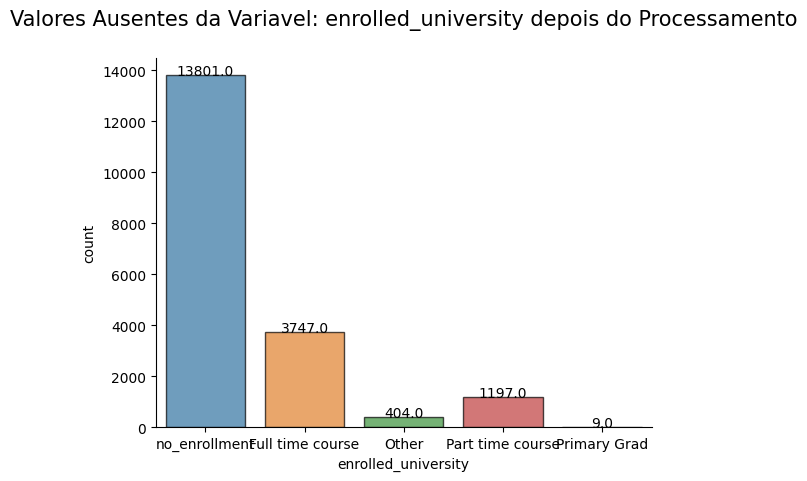

In [89]:
# Plot
sns.countplot(data= new_df.fillna('NaN'), x= 'enrolled_university', alpha = 0.7, edgecolor = 'black')
sns.despine()
plt.xticks()
bound = ax.get_xbound()
ax = plt.gca()
for p in ax.patches:
  ax.annotate(f'\n{p.get_height()}', (p.get_x()+0.4, p.get_height()), ha="center", color = 'black', size = 10)
plt.title("Valores Ausentes da Variavel: enrolled_university depois do Processamento\n", fontsize = 15)
plt.show()

In [90]:
new_df.head()

,city_development_index,relevent_experience,enrolled_university,education_level,major_discipline,experience,company_type,training_hours,target
0,0.92,Has relevent experience,no_enrollment,Graduate,STEM,>20,NaN,36,1.0
1,0.776,No relevent experience,no_enrollment,Graduate,STEM,15,Pvt Ltd,47,0.0
2,0.624,No relevent experience,Full time course,Graduate,STEM,5,NaN,83,0.0
3,0.789,No relevent experience,Other,Graduate,Business Degree,<1,Pvt Ltd,52,1.0
4,0.767,Has relevent experience,no_enrollment,Masters,STEM,>20,Funded Startup,8,0.0
